In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# change path if necessary
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1' # to be adapated
sys.path.insert(0,my_path + r'\code\COMMON')

# imports
import numpy as np 
import matplotlib.pyplot as plt

from implementations import *
from labels import idx_2labels
from costs import *
from optimize_hyperparams import *
from cross_validation import *
from step_wise import *

# Build dataset

In [2]:
from proj1_helpers import load_csv_data 

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

In [3]:
from outliers import handle_outliers

# handle outliers
X_raw, y = handle_outliers(input_data_raw, y_raw, -999, 'mean')

# set y in {0,1} instead of {-1,1}
y[np.where(y==-1)]=0

-999 are replaced by the mean value of the feature


In [4]:
# get feature names 
all_features_raw = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])

In [5]:
from extend_features import extend_features

# feature degree
degree = 1

# extend feature set
all_candidates, features = extend_features(X_raw, all_features_raw, degree, is_add_log = True)
print(all_candidates.shape)

---------------------------
Features have been set to the power(s): [1]
16 Features of the momentum have been added
4 logarithmic features have been added.
Data have been standardized.
---------------------------
(250000, 50)


# Feature Selection through step-wise

In [8]:
# model parameters
model = dict()
model['method'] = 'lr' # 'lrr' if regularized with a penalization 'lambda_' otherwise 'lr' 
model['loss'] = 'loglikelihood'

# model hyperparameter
model['gamma'] = 1e-5

# other
model['method_minimization'] = 'gd' # 'gd' (gradient_descent) or 'newton' (newton descent leads to non invertible matrice "S" which is too big)
model['threshold'] = 5000
model['max_iters'] = 10000
model['debug_mode'] = 0

# R2 type
R2_method = 'McFadden' 

# estimate R2 error through cross validation (1 or 0)
cv = 0
model['k_fold'] = 10

In [18]:
# step-wise
best_R2adj, idx_features = stepwise(model, R2_method, all_candidates, features, y, cv)

step 1 : R2 adjusted = 0.11273281839
step 2 : R2 adjusted = 0.138911714063
step 3 : R2 adjusted = 0.160446562661
step 4 : R2 adjusted = 0.170981704452
step 5 : R2 adjusted = 0.189691372766
step 6 : R2 adjusted = 0.199239236886
step 7 : R2 adjusted = 0.205032612973
step 8 : R2 adjusted = 0.20982969592
step 9 : R2 adjusted = 0.215580544815
step 10 : R2 adjusted = 0.219989927378
step 11 : R2 adjusted = 0.232553008358
step 12 : R2 adjusted = 0.238736316216
step 13 : R2 adjusted = 0.24390953115
step 14 : R2 adjusted = 0.246973883723
step 15 : R2 adjusted = 0.250598027605
step 16 : R2 adjusted = 0.253131936571
step 17 : R2 adjusted = 0.257206776152
step 18 : R2 adjusted = 0.260088921609
step 19 : R2 adjusted = 0.261105222768
step 20 : R2 adjusted = 0.262991983819
step 21 : R2 adjusted = 0.263875127657
step 22 : R2 adjusted = 0.263918698186
step 23 : R2 adjusted = 0.263940649509
step 24 : R2 adjusted = 0.263980605702
step 25 : R2 adjusted = 0.264021473715
step 26 : R2 adjusted = 0.26404535870

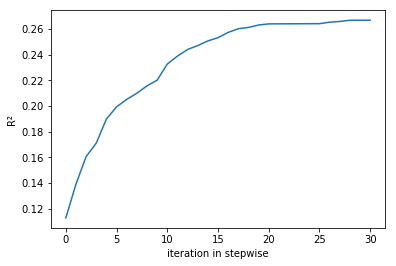

In [19]:
# display selected features
results_r2_stepwise(best_R2adj[:len(best_R2adj)-1], idx_features)

In [31]:
print(best_R2adj[:len(best_R2adj)-1])

[0.11273281838983562, 0.13891171406280725, 0.16044656266104906, 0.17098170445217648, 0.18969137276638318, 0.19923923688581474, 0.20503261297336955, 0.20982969592001646, 0.21558054481540401, 0.21998992737793899, 0.23255300835750659, 0.23873631621611638, 0.24390953115037492, 0.24697388372327883, 0.25059802760472738, 0.25313193657063432, 0.25720677615235077, 0.26008892160878061, 0.26110522276796772, 0.26299198381858441, 0.26387512765672694, 0.26391869818602426, 0.26394064950932167, 0.26398060570185783, 0.26402147371485107, 0.26404535870678475, 0.2651776337384083, 0.26577549296097336, 0.26669283364303698, 0.26670398696534497, 0.26671337323997568]


In [32]:
# save the selected features
Xsw = all_candidates[:, idx_features]
print(Xsw.shape)
print(y.shape)

(250000, 31)
(250000,)


# Optimization of degree when lambda = 0

In [40]:
# pick Xsw
Xsw2 = all_candidates[:, idx_features[:3]]

# change optimization parameters
model['gamma'] = 1e-5
model['max_iters'] = 5000
model['threshold'] = 5000

# optimization parameters
degree_min = 1 
degree_max = 10
degree_steps = 1
model['k_fold'] = 3

# optimize degree
w_opt, loss_tr, loss_te, degree_opt = optimize_degree(y, Xsw2, degree_min, degree_max, degree_steps, model, debug_mode=1)

# plot results
plt.figure()
plt.plot(build_poly(x, degree_opt).dot(w_opt))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()

tested degree:  [ 1  2  3  4  5  6  7  8  9 10] 

------------------------------------------ cross validation with degree =  1
0
1
2
------------------------------------------ cross validation with degree =  2


D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1\code\COMMON\standard.py:9: RuntimeWarning: invalid value encountered in true_divide
  x = x / std_x


NameError: name 'mean' is not defined

# Optimization of lambda through simple cross validation

In [ ]:
# optimization parameters
lambda_min = -10 
lambda_max = 1
lambda_steps = 10
model['k_fold'] = 10

# optimize lambda_
w_opt, loss_tr, loss_te, lambda_opt, success_rate = optimize_lambda(y, Xsw, lambda_min, lambda_max, lambda_steps, arg_rr, debug_mode=1)